## Sierpinski's Triangle from Pascal's Triangle

Jacob L. Fine

June 13th, 2024

Pascal's Triangle is obtained as follows: start at 1, and for each row, start at 1 and fill in the middle elements by summing the two consecutive values in the previous row. 

A very interesting result from Pascal's Triangle is that we can obtain the classic fractal of triangles, known as Sierpinski's Triangle, by shading in the odd numbers of Pascal's Triangle. We will demonstrate this below, by generating Pascal's Triangle, and generating a plot where odd numbers are shaded in.

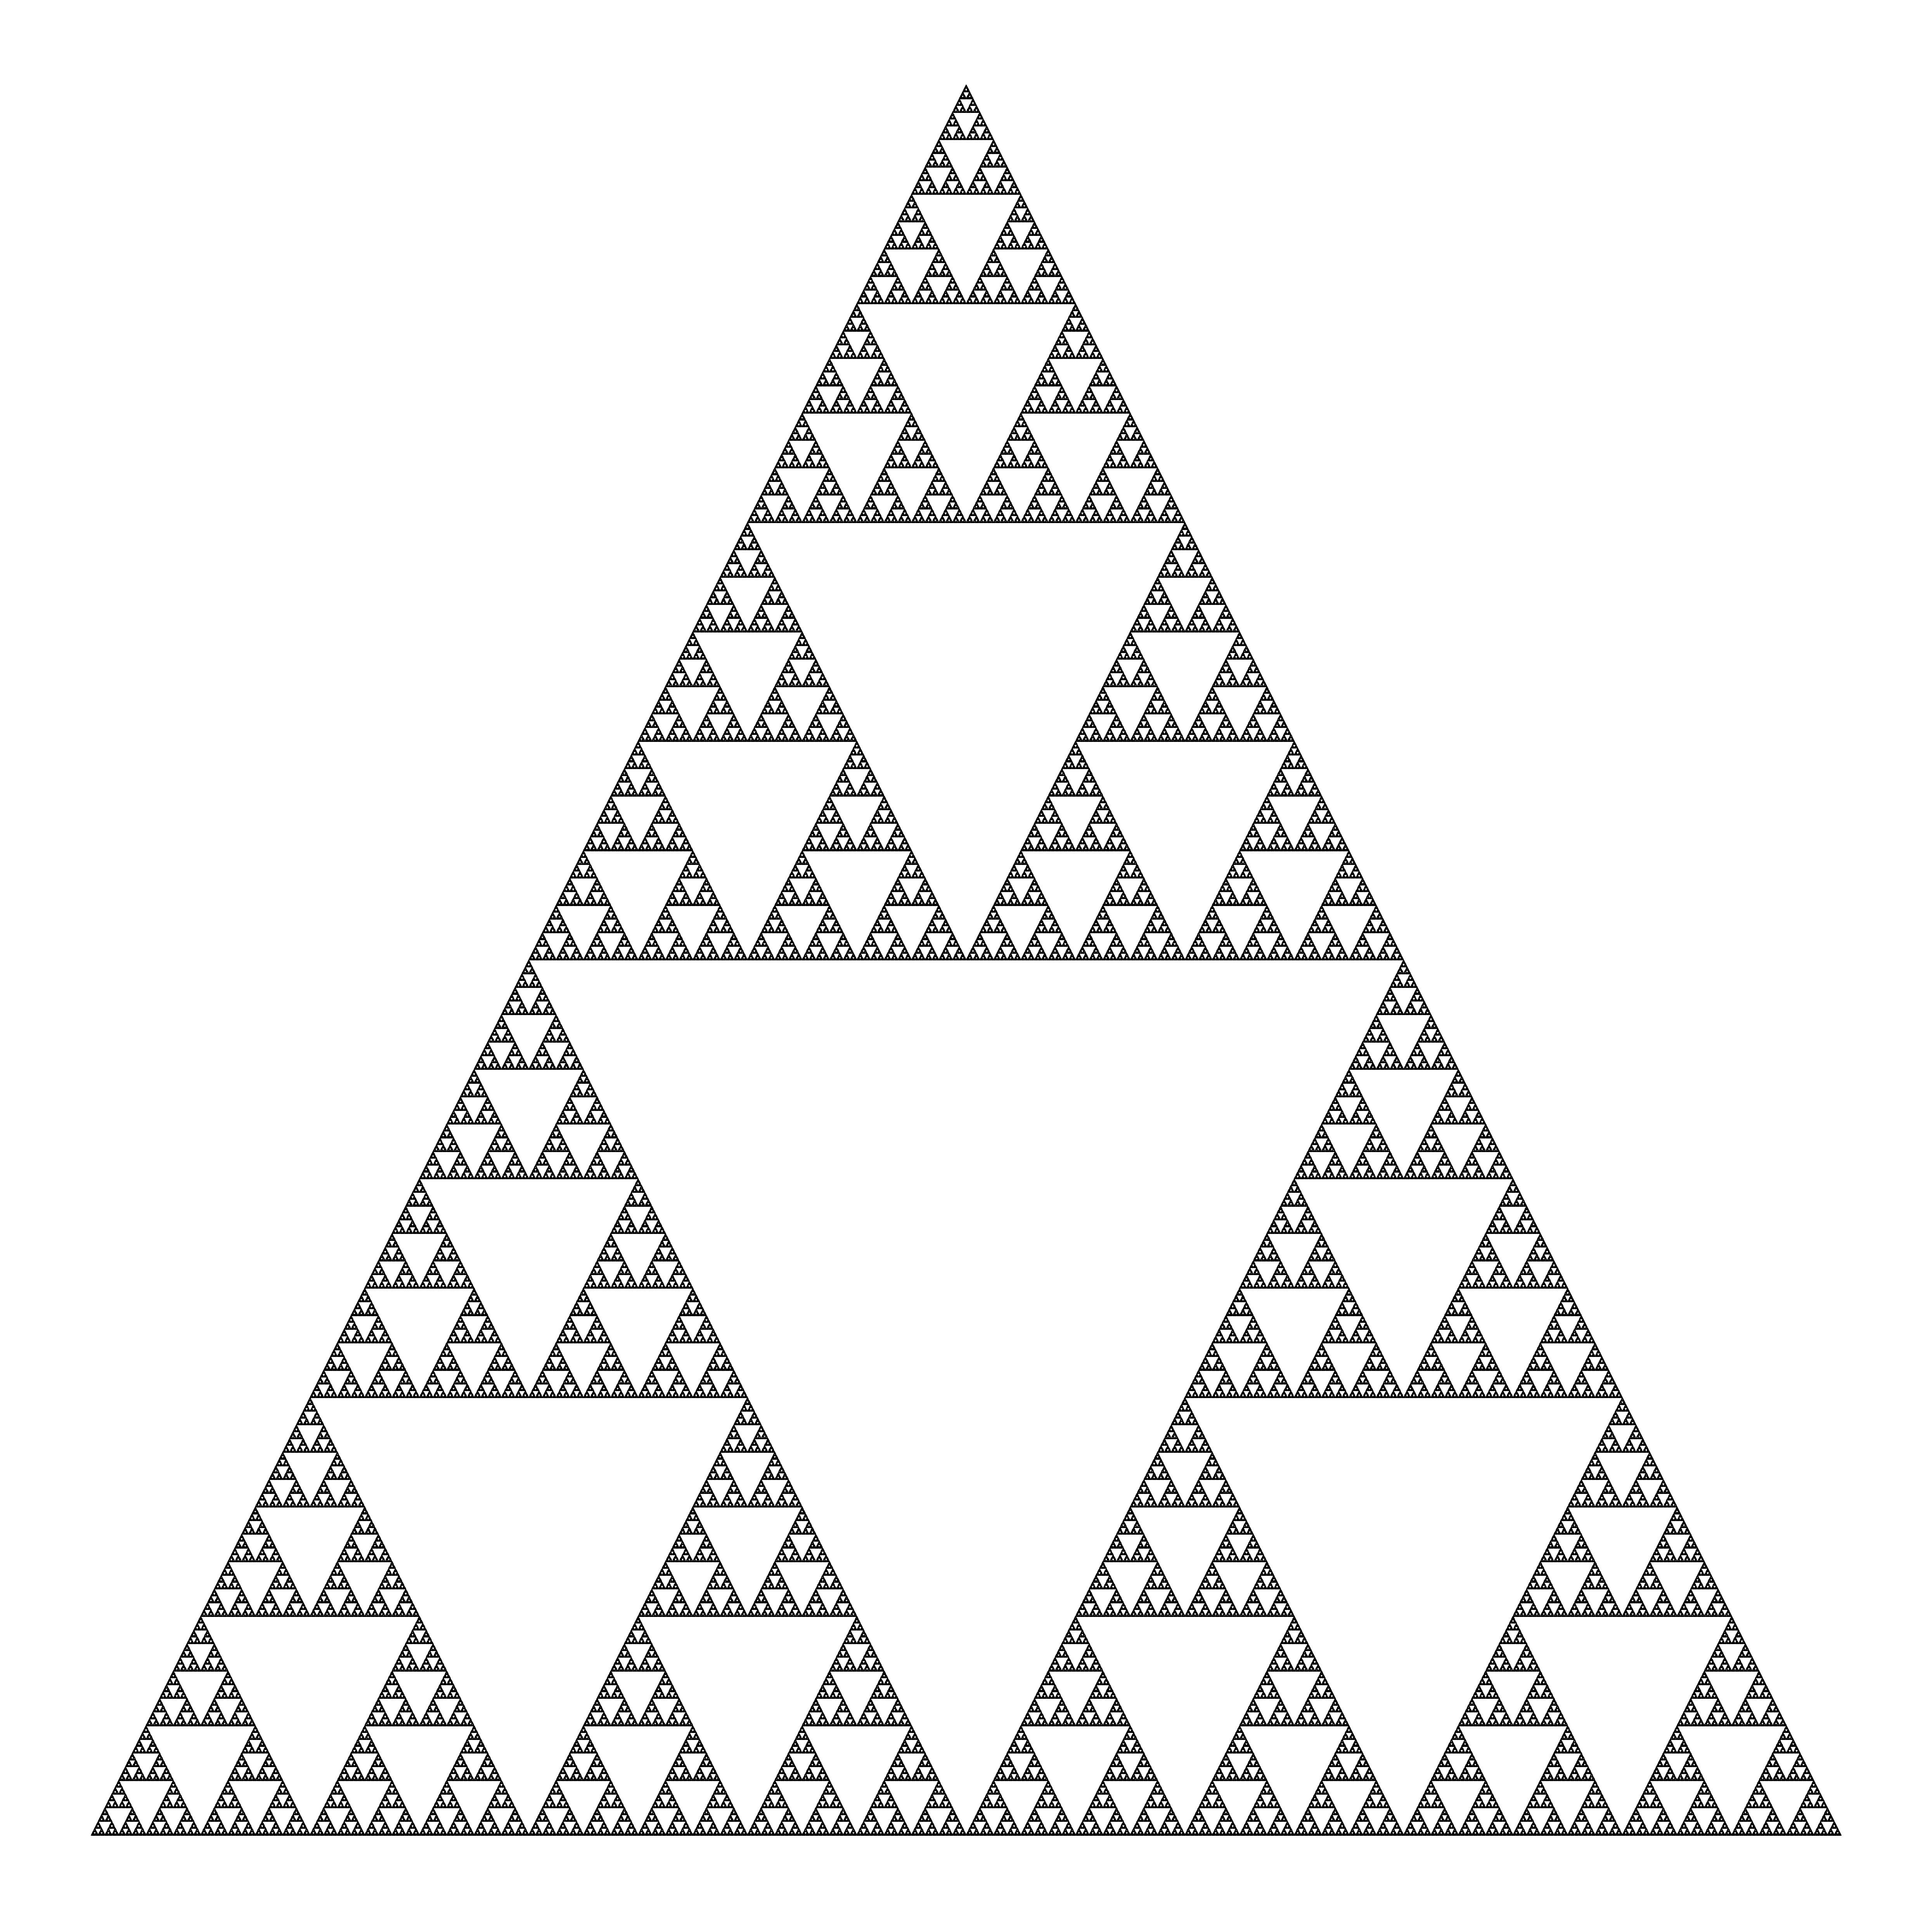

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def pascals_triangle(rows): # a function to generate the rows of pascals triangle, with odd numbers represented as 1, else 0
    triangle = []
    for n in range(rows):
        row = [1]  # starts each row with 1
        if triangle:  # if the triangle is not empty
            last_row = triangle[-1]  # considers the previous row
            middle_values = [sum(pair) % 2 for pair in zip(last_row, last_row[1:])]  # sums the pairs of adjacent elements, and finds odd numbers by if mod 2 = 1
            row.extend(middle_values) # extends the current row by the middle values
            row.append(1)  # adds 1 to end the row
        triangle.append(row)  # appends the row to the growing triangle
    return triangle

def plot_sierpinski(triangle): 
    rows = len(triangle)  # defines the number of rows
    points = []
    for i in range(rows):  # goes through each row
        for j in range(len(triangle[i])):  # goes through each element in the row
            if triangle[i][j] == 1:  # if the number is odd, i.e., reprsented by 1
                points.append([i, j - i/2])  # defines the location of points to fill in based on which items are 1
    
    points = np.array(points)   # converts points to np array
    # plots the values
    plt.figure(figsize=(np.sqrt(rows), np.sqrt(rows)))  # figure size based on sqrt of number of rows
    plt.scatter(points[:, 1], -points[:, 0], s=1, color='k')  # ensure to invert y for the correct position
    plt.axis('equal')
    plt.axis('off')
    plt.show()

# number of rows to consider
rows = 64*64

# generate Pascal's triangle
triangle = pascals_triangle(rows)

# plot Sierpinski's triangle from Pascal's triangle
plot_sierpinski(triangle)
